In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

<AxesSubplot:title={'center':'Precipitation: 8/23/16 - 8/23/17'}, xlabel='date'>

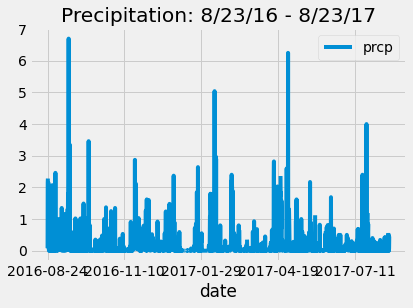

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
latestdate = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())

# Calculate the date 1 year ago from the last data point in the database
latestdate = list(np.ravel(latestdate))[0]
latestdate = dt.datetime.strptime(latestdate, '%Y-%m-%d')
latestYear = int(dt.datetime.strftime(latestdate, '%Y'))
latestMonth = int(dt.datetime.strftime(latestdate, '%m'))
latestDay = int(dt.datetime.strftime(latestdate, '%d'))
yearBefore = dt.date(latestYear, latestMonth, latestDay) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
rainData = (session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > yearBefore).order_by(Measurement.date).all())

# Save the query results as a Pandas DataFrame and set the index to the date column
rainTable = pd.DataFrame(rainData)
rainTable = rainTable.set_index('date')

# Sort the dataframe by date
rainTable = rainTable.sort_index(ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
rainTable.plot(title="Precipitation: 8/23/16 - 8/23/17") 


In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rainTable.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [25]:
# Design a query to show how many stations are available in this dataset?
numberofstations = session.query(Station).count()
print(f"The number of stations are : {numberofstations}")

The number of stations are : 9


In [27]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
numberofstations = (session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all())

numberofstations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [72]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
IDstation = numberofstations[0][0]
nameofstation =  (session.query(Station.name).filter_by(station = IDstation))
nameofstation = nameofstation[0][0]
print(f"THe most active station is {IDstation}: {nameofstation}")

# highest temperature recorded, and average temperature of the most active station?
highesttemp = (session.query(func.max(Measurement.tobs)).filter(Measurement.station == IDstation))
highesttemp = '{0:.3}'.format(highesttemp[0][0])
print(f"The highest temperature recorded was {highesttemp} degress farenheit")

avgtemp = (session.query(func.avg(Measurement.tobs)).filter(Measurement.station == IDstation))
avgtemp = '{0:.3}'.format(avgtemp[0][0])
print(f"The average temperature recorded is {avgtemp} degrees Farenheit.")

THe most active station is USC00519281: WAIHEE 837.5, HI US
The highest temperature recorded was 85.0 degress farenheit
The average temperature recorded is 71.7 degrees Farenheit.


<AxesSubplot:ylabel='Frequency'>

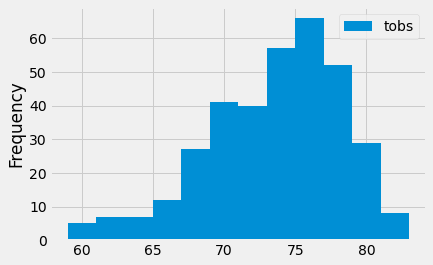

In [74]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempData = (session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > yearBefore)\
    .filter(Measurement.station == IDstation).order_by(Measurement.date).all())
tempTable = pd.DataFrame(tempData)
tempTable = tempTable.set_index('date')
tempTable = tempTable.sort_index(ascending=True)
tempTable.plot(kind='hist', bins=12)

## Bonus Challenge Assignment

In [75]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip = '2019-04-08 to \n 2019-04-19'
tripStartDate = '2017-04-08'
tripEndDate = '2017-04-19'

#calculate the tmin, tavg, and tmax 
tripTemps = calc_temps(tripStartDate, tripEndDate)

tripTemps

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [76]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
